In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV

data = pd.read_csv('CTA.csv', low_memory=False)

In [2]:
data

,service_date,day_type,bus,rail_boardings,total_rides,DATE,AWND,AWND_ATTRIBUTES,PRCP,SNOW,SNWD,SNWD_ATTRIBUTES,TAVG,TMAX,TMIN
0,1/1/2001,U,297192,126455,423647,1/1/2001,7.61,",,X",0.00,0.0,17.0,",,0,",15.0,24,5
1,1/2/2001,W,780827,501952,1282779,1/2/2001,8.50,",,X",0.00,0.0,15.0,",,0,",12.0,19,5
2,1/3/2001,W,824923,536432,1361355,1/3/2001,11.41,",,X",0.00,0.0,14.0,",,0,",18.0,28,7
3,1/4/2001,W,870021,550011,1420032,1/4/2001,11.63,",,X",0.00,0.0,14.0,",,0,",25.0,30,19
4,1/5/2001,W,890426,557917,1448343,1/5/2001,13.87,",,X",0.00,0.0,13.0,",,0,",29.0,36,21
5,1/6/2001,A,577401,255356,832757,1/6/2001,8.28,",,X",0.00,0.0,12.0,",,0,",25.0,33,17
6,1/7/2001,U,375831,169825,545656,1/7/2001,9.62,",,X",0.00,0.0,12.0,",,0,",28.0,34,21
7,1/8/2001,W,985221,590706,1575927,1/8/2001,10.07,",,X",0.00,0.0,12.0,",,0,",19.0,26,12
8,1/9/2001,W,978377,599905,1578282,1/9/2001,10.96,",,X",0.00,0.0,12.0,",,0,",17.0,23,10
9,1/10/2001,W,984884,602052,1586936,1/10/2001,10.07,",,X",0.00,0.0,11.0,",,0,",26.0,34,18


In [3]:
print(data.shape)

(6482, 15)


In [4]:
data.describe()

,bus,rail_boardings,total_rides,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
count,6.482000e+03,6.482000e+03,6.482000e+03,6482.000000,6482.000000,6482.000000,6451.000000,3681.000000,6482.000000,6482.000000
mean,8.052255e+05,5.716882e+05,1.376914e+06,9.524894,0.106645,0.107189,0.501504,51.330345,59.677414,42.019901
std,2.304721e+05,1.781116e+05,3.908823e+05,3.582570,0.320769,0.644074,1.797477,19.810353,21.325504,19.004309
min,1.642560e+05,8.799200e+04,2.829100e+05,1.340000,0.000000,0.000000,0.000000,-8.000000,-2.000000,-18.000000
25%,6.157915e+05,4.240668e+05,1.016220e+06,6.930000,0.000000,0.000000,0.000000,36.000000,42.000000,28.000000
50%,8.875790e+05,6.184870e+05,1.559762e+06,8.950000,0.000000,0.000000,0.000000,53.000000,62.000000,43.000000
75%,9.933210e+05,7.125880e+05,1.668118e+06,11.630000,0.040000,0.000000,0.000000,69.000000,79.000000,58.000000
max,1.211992e+06,1.146516e+06,2.049519e+06,26.620000,6.860000,16.200000,21.000000,90.000000,103.000000,82.000000


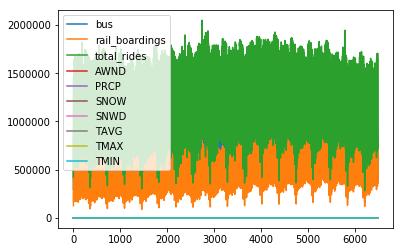

In [5]:
data.plot()

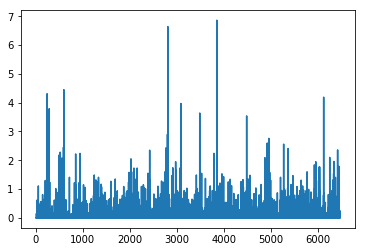

In [6]:
data['PRCP'].plot()

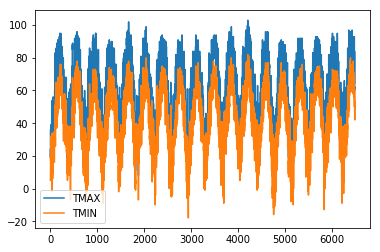

In [7]:
data[['TMAX','TMIN']].plot()

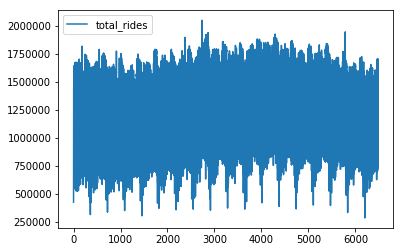

In [8]:
data[['total_rides']].plot()

In [9]:
baddays = data[(data['PRCP']>0) | (data['SNOW'] >0) ]

In [10]:
worsedays = data[(data['PRCP']>1) | (data['SNOW'] >1) ]

In [11]:
terribledays = data[(data['PRCP']>3) | (data['SNOW'] >3) ]

In [12]:
baddays

,service_date,day_type,bus,rail_boardings,total_rides,DATE,AWND,AWND_ATTRIBUTES,PRCP,SNOW,SNWD,SNWD_ATTRIBUTES,TAVG,TMAX,TMIN
13,1/14/2001,U,373091,174842,547933,1/14/2001,8.95,",,X",0.15,0.0,8.0,",,0,",34.0,36,32
14,1/15/2001,W,675845,412149,1087994,1/15/2001,12.30,",,X",0.05,0.0,6.0,",,0,",33.0,35,31
25,1/26/2001,W,965324,597039,1562363,1/26/2001,12.97,",,X",0.06,1.0,5.0,",,0,",26.0,31,21
27,1/28/2001,U,368819,174434,543253,1/28/2001,6.04,",,X",0.03,0.1,5.0,",,0,",22.0,29,14
28,1/29/2001,W,953532,587052,1540584,1/29/2001,12.30,",,X",0.62,0.0,5.0,",,0,",34.0,42,29
29,1/30/2001,W,982046,607858,1589904,1/30/2001,7.61,",,X",0.21,0.4,2.0,",,0,",36.0,40,32
33,2/3/2001,A,611703,263612,875315,2/3/2001,9.17,",,X",0.01,0.3,1.0,",,0,",20.0,30,10
34,2/4/2001,U,404212,178398,582610,2/4/2001,5.82,",,X",0.03,0.1,2.0,",,0,",30.0,34,26
35,2/5/2001,W,1045944,600588,1646532,2/5/2001,10.07,",,X",0.01,0.2,1.0,",,0,",29.0,32,26
37,2/7/2001,W,1015059,609022,1624081,2/7/2001,7.38,",,X",0.05,0.0,0.0,"T,,0,",26.0,35,17


In [13]:
gooddays = data[(data['PRCP'] == 0) & (data['SNOW'] == 0) ]

In [14]:
gooddays

,service_date,day_type,bus,rail_boardings,total_rides,DATE,AWND,AWND_ATTRIBUTES,PRCP,SNOW,SNWD,SNWD_ATTRIBUTES,TAVG,TMAX,TMIN
0,1/1/2001,U,297192,126455,423647,1/1/2001,7.61,",,X",0.0,0.0,17.0,",,0,",15.0,24,5
1,1/2/2001,W,780827,501952,1282779,1/2/2001,8.50,",,X",0.0,0.0,15.0,",,0,",12.0,19,5
2,1/3/2001,W,824923,536432,1361355,1/3/2001,11.41,",,X",0.0,0.0,14.0,",,0,",18.0,28,7
3,1/4/2001,W,870021,550011,1420032,1/4/2001,11.63,",,X",0.0,0.0,14.0,",,0,",25.0,30,19
4,1/5/2001,W,890426,557917,1448343,1/5/2001,13.87,",,X",0.0,0.0,13.0,",,0,",29.0,36,21
5,1/6/2001,A,577401,255356,832757,1/6/2001,8.28,",,X",0.0,0.0,12.0,",,0,",25.0,33,17
6,1/7/2001,U,375831,169825,545656,1/7/2001,9.62,",,X",0.0,0.0,12.0,",,0,",28.0,34,21
7,1/8/2001,W,985221,590706,1575927,1/8/2001,10.07,",,X",0.0,0.0,12.0,",,0,",19.0,26,12
8,1/9/2001,W,978377,599905,1578282,1/9/2001,10.96,",,X",0.0,0.0,12.0,",,0,",17.0,23,10
9,1/10/2001,W,984884,602052,1586936,1/10/2001,10.07,",,X",0.0,0.0,11.0,",,0,",26.0,34,18


In [15]:
gooddays['total_rides'].mean()

1386545.5820321883

In [16]:
baddays['total_rides'].mean()

1359623.0301854247

In [17]:
worsedays['total_rides'].mean()

1304446.450617284

In [18]:
terribledays['total_rides'].mean()

1256139.945945946

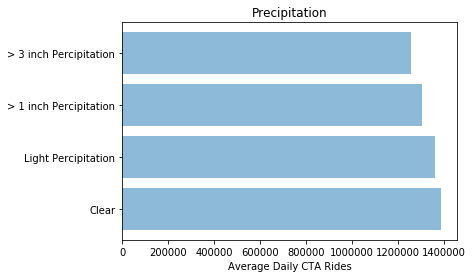

In [19]:
objects = ('Clear', 'Light Percipitation', '> 1 inch Percipitation', '> 3 inch Percipitation')
y_pos = np.arange(len(objects))
performance = [gooddays['total_rides'].mean(),baddays['total_rides'].mean(),worsedays['total_rides'].mean(),terribledays['total_rides'].mean()]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average Daily CTA Rides')
plt.title('Precipitation')
 
plt.show()

In [20]:
hot = data[(data['TMAX'] >98) ]

In [21]:
cold = data[(data['TMIN'] <0)]

In [22]:
data['total_rides'].mean()

1376913.7712125888

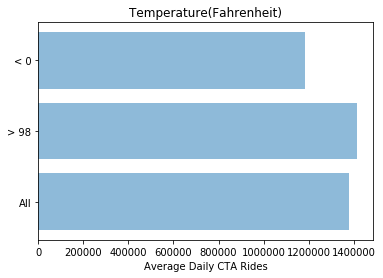

In [23]:
objects = ('All','> 98', '< 0' )
y_pos = np.arange(len(objects))
performance = [data['total_rides'].mean(),hot['total_rides'].mean(),cold['total_rides'].mean()]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average Daily CTA Rides')
plt.title('Temperature(Fahrenheit)')
 
plt.show()